# About
In this file, the frequency characteristics of different clipping-distortion approaches. 
The aim is to find approaches to make even/odd harmonic distortions

In [8]:
# IMPORT
import numpy as np
from matplotlib import pyplot as plt
import scipy.signal as signal

BASE_SAMPLE_RATE = 44100
MAX_POINTS = 20000

# Transforms array `x` from time into frequency domain. 
# Return value is tuple of (magnitude, frequencies) 
def to_freq(x: np.ndarray, sampling_rate=BASE_SAMPLE_RATE) -> tuple[np.ndarray, np.ndarray]:
     N = len(x)
     fft_result = np.fft.rfft(x)
     magnitude = np.abs(fft_result.real) / N  # Scale by number of samples

     freq_bins = np.fft.rfftfreq(N, d=1/sampling_rate)[:N//2]
     magnitude = magnitude[:N//2] * 2   # Double for one-sided spectrum (except DC)
     magnitude = np.clip(magnitude, 0, 10)

     return freq_bins, magnitude

# Generate signal
def make_signal(freq = 300, sampling_rate=BASE_SAMPLE_RATE) -> np.ndarray:
     DURATION = 2
     x = np.linspace(0, DURATION, sampling_rate*DURATION) 
     return np.sin(x * 2 * np.pi * freq)

# Plot time domain signal `x` in frequency domain, title of plot is `name``
def plot(x: np.ndarray, name: str):
     global signal_f
     f = to_freq(x)
     f = (f[0][:MAX_POINTS], f[1][:MAX_POINTS])
     sf = (signal_f[0][:MAX_POINTS], signal_f[1][:MAX_POINTS])

     plt.plot(*f, linestyle='-', color='b', label='distorted')
     plt.plot(*sf, linestyle='--', color='g', label='original')

     val_range = (np.max(f[0]) - np.min(f[0]))
     plt.xticks(np.arange(np.min(f[0]), np.max(f[0])+1, val_range/10))
     plt.xlabel('Frequency (Hz)')
     plt.ylabel('Gain (dB)')

     plt.title(name)
     plt.legend()
     plt.grid(True)
     plt.show()



signal_x = make_signal()
signal_f = to_freq(signal_x)

### Tanh Distortion

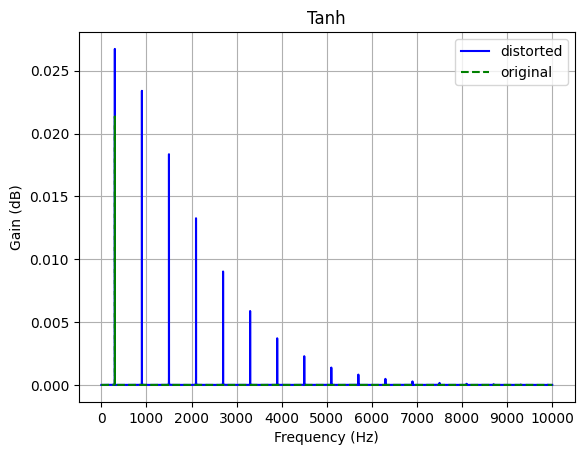

In [14]:
def soft_clipping_tanh(x, gain=5.0):
    return np.tanh(gain * x)

tanh_x = soft_clipping_tanh(signal_x, gain=5)
plot(tanh_x, 'Tanh')


### Atan Distortion

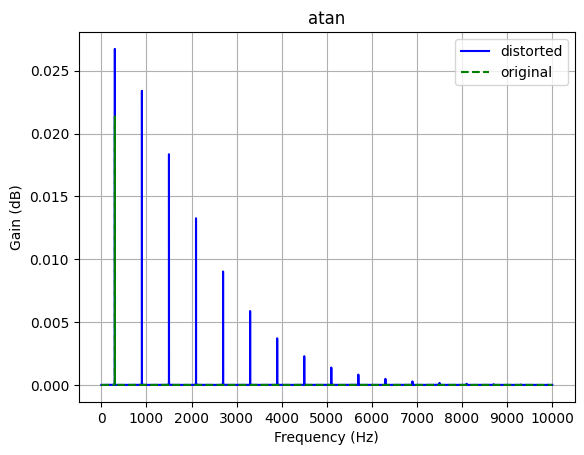

In [ ]:
def soft_clipping_atan(x, gain=5.0):
    return np.atan(gain * x)

atan_x = soft_clipping_atan(signal_x, gain=50)
plot(tanh_x, 'Atan')


### Cubic clipping: $ gain * x - (gain ^ 3) * (x ^ 3) / 3$

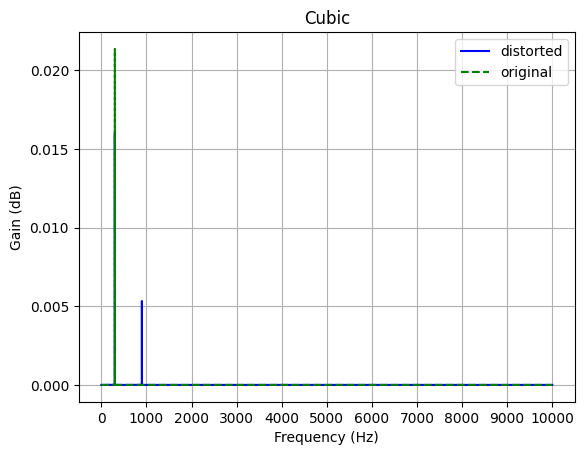

In [16]:
def soft_clipping_cubic(x, gain=5.0):
    return gain * x - (gain ** 3) * (x ** 3) / 3
cubic_x = soft_clipping_cubic(signal_x, gain=1)
plot(cubic_x, 'Cubic')

### Specific exponential: $\frac{x-Q}{1-\exp((-x+Q)\cdot d)} + \frac{Q}{1-\exp(d\cdot Q)}$

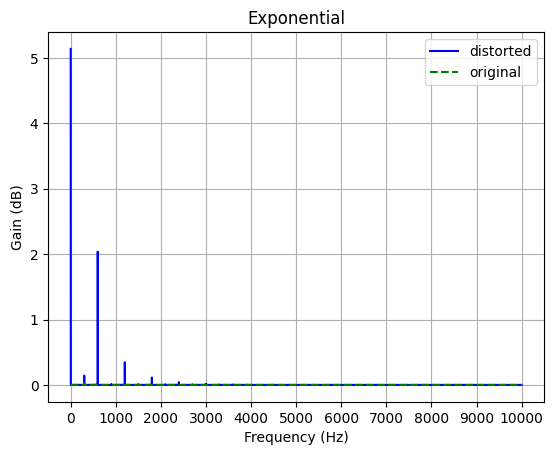

In [17]:
def soft_clipping_exponential(x, Q, d):
    return (x-Q) / (1 - np.exp((Q-x)*d)) + Q / (1 - np.exp(d*Q))

exp_x = soft_clipping_exponential(signal_x*10, 1, -2)
exp_x = exp_x + signal_x

plot(exp_x, 'Exponential')

### Piecewise-cubic

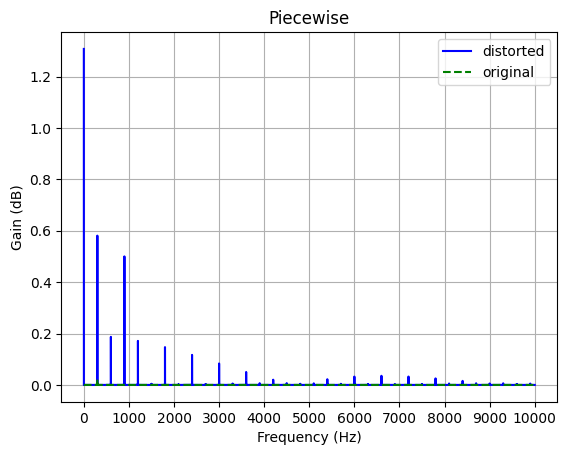

In [18]:
def hard_clipping_piecewise(x, gain=5):
     x = x * gain
     greater_mask = x >= 1
     smaller_mask = x <=-1

     cubic = x * (1-greater_mask*smaller_mask)

     return greater_mask * 3/4 + smaller_mask * 3/4 + (3*cubic + cubic**3)/4

piecewise_x = hard_clipping_piecewise(signal_x, 5)

plot(piecewise_x, 'Piecewise')